In [1]:
import warnings
warnings.filterwarnings('ignore')

# Notebook 8 - Utilizar datos para construir modelos predictivos

Las Bases de Datos sirven en general en 2 grandes tipos de caso de uso:
- soportar necesidades de los softwares que requieren <b>gestionar transacciónes</b> (ACID, grandes números de transacciónes rápidas) para su funcionamiento.
- ofrecer a científicos o analistas conjuntos de datos sobre los cuáles <b>realizar análisis</b> y extraer nuevos conocimientos.

En este notebook, queremos mostrar cómo se puede utilizar datos para realizar <b>análisis predictivo</b>. No es un curso completo sobre Machine Learning, sino que queremos ilustrar el interés de utilizar datos para la toma de decisiones.

## 1. ¿Qué es el análisis predictivo?

- variedad de técnicas estadísticas, machine learning, minería de datos

- analizar los datos del presente o del pasado para hacer predicciones sobre eventos posibles en el futuro

- gran número de aplicaciones: Industria, Economía, Salud, Marketing, Seguro, Ciencia, etc.

- se diferencia del análisis descriptivo, la cual busca entender un fenómeno complejo explicando las relaciones entre los datos

## 2. Ejemplos de análisis predictivo

Aplicaciones con objetivos comerciales o científicos/humanistas

- predecir si una persona podría comprar uno de nuestos productos (Marketing)

- predecir si una persona va a tener una enfermedad (Salud, Seguro)

- predecir si una pieza mecánica va a fallar (Industria), etc.

- predecir si un accidente puede occurir en cierto lugar

- predecir si el discurso de un medio contiene marcas de sexismo o de racismo

- etc.


## 3. ¿Qué variable se puede predecir con técnicas de Machine Learning y cómo?

Con técnicas de Machine Learning, se puede tratar de predecir:

- el valor de una <b>variable discreta</b> (problema de clasificación). Ej: Entre la pelicula A y B, ¿cuál es su favorita? --> Predicción: B

- el valor de una <b>variable continua</b> (problema de regresión). Ej. ¿Cuánta plata va a gastar esta persona para ir al Cinema durante el próximo semestre? --> Predicción: $25.500

Para resolver problemas de clasificación o de regresión, se necesitan seguir 3 etapas:
1. obtener un dataset de entrenamiento sobre datos del presente y pasado
2. utilizar un algoritmo de aprendizaje que permite aprender un modelo predictivo
3. utilizar un dataset de test para probar el modelo predictivo y medir su rendimiento

A continuación presentamos 3 casos de estudio (2 de clasificación y 1 de regresión) simples para introducir cómo utilizar datos para construir modelos predictivos.


## 4.  Caso de estudio: predecir la categoría de una flor

Supongamos que tenemos una base de datos que almacena observaciones pasadas sobre 3 categorías de flores: 1) Iris Setosa, 2) Iris Versicolour, 3) Iris Virginica.

Por cada observación, almacenamos los valores de 4 atributos: el <b>largo y el ancho de sus sepalos</b>, y el <b>largo y el ancho de sus petalos</b>, en centimetros.

<img src="iris.jpg"></img>

Queremos aprender un modelo predictivo capaz de clasificar automáticamente una nueva flor. 


### 4.1 Obtención del dataset de entrenamiento y del dataset de test

'Iris' es un dataset bien conocido por los <i>data scientists junior</i>, permite descubrir primeros conceptos básicos de Machine Learning con un dataset simple. Más detalles sobre el dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

SciKit-Learn es una librería científica en Python para utilizar algoritmos estandares de Machine Learning: https://scikit-learn.org/stable/index.html.
En su API, SciKit-Learn ofrece un método para cargar facilmente los datos del dataset Iris.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

El dataset Iris contiene 150 observaciones de flores.

In [3]:
len(iris.data)

150

In [4]:
#iris.target #(categorias)
iris.data #(datos)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Para facilitar la manipulación de los datos de Iris, cargamos los datos en una tabla 'DataFrame' del paquete Pandas.

In [9]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=iris['data'],columns= iris['feature_names'])
categories = pd.DataFrame(data=iris['target'],columns=['target'])
#Mostrar los 5 primeros datos del dataset
data[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Observamos que el dataset tiene 4 atributos + una columna (target) que indica la categoría de cada flor. Cada fila del dataset corresponde a una flor observada en el pasado.

In [6]:
categories[:5]

,target
0,0
1,0
2,0
3,0
4,0


Vamos a dividir nuestro dataset en 2 partes:
- una parte de 'entrenamiento' que va a servir para generar un modelo predictivo
- una parte de 'test' que va a servir para evaluar el rendimiento del modelo predictivo

La API de SciKit-Learn ofrece un metodo para dividir el dataset:

In [10]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


Ahora tenemos 4 variables:
- X_train: contiene los datos de entrenamiento
- X_test: contiene los datos de test
- y_train: contiene las categorias reales de las flores del dataset de entrenamiento
- y_test: contiene las categorias reales de las flores del dataset de test

In [8]:
X_train[:3]

array([[5.4, 3.4, 1.5, 0.4],
       [4.6, 3.2, 1.4, 0.2],
       [6.1, 2.9, 4.7, 1.4]])

### 4.2 Crear un modelo predictivo

Ahora que nuestros datos están listos, vamos a utilizar un algoritmo que va a aprender un modelo predictivo. Existen varios tipos de algoritmos de aprendizaje para problemas de clasificación. Citamos en particular: Naive Bayes, Árbol de Decisión, k-Vecinos-más-cercanos, Regresión Logística, SVM, Redes Neuronales, etc.

En este primer ejemplo, utilizaremos el algoritmo muy simple, k-Vecinos-más cercanos: 


In [7]:
from sklearn.neighbors import KNeighborsClassifier 

#Inicializamos el algoritmo k_Vecinos_más_cercano con un parametro de 4 vecinos.
algo_knn = KNeighborsClassifier(n_neighbors=4)  

Con SciKit-Learn, el aprendizaje de un modelo predictivo consiste una linea de código, utilizando el método <code>fit()</code>:

In [11]:
modelo_predictivo = algo_knn.fit(X_train, y_train)

### 4.3 Utilizar el modelo predictivo para realizar predicciones

Una vez que tenemos nuestro modelo predictivo. Lo utilizaremos ahora sobre los datos de test, para medir si es capaz de tomar buenas predicciones.

Realizamos predicciones con el modelo:

In [12]:
predicciones = modelo_predictivo.predict(X_test)
for p in predicciones:
    print(p,end=',')

0,0,2,2,1,1,0,2,1,0,0,1,1,2,1,0,1,0,1,0,2,1,2,2,1,2,1,0,2,2,2,0,0,2,2,0,1,0,1,1,0,2,1,0,1,

Comparamos con las categorias reales de las flores:

In [12]:
for i in y_test:
    print(i,end=',')

1,2,1,0,0,0,2,2,0,1,2,0,2,1,1,0,0,0,2,2,1,0,2,0,1,1,0,0,2,0,1,1,2,0,0,2,1,2,0,0,1,2,0,0,2,

Parece que nuestro modelo predictivo ha logrado realizar predicciones bastante correctas. Confirmamoslo con la API de SciKit-Learn:

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, predicciones))  
print(classification_report(y_test, predicciones)) 

[[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Comparación de la tasa de error probando varios valores de K:

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

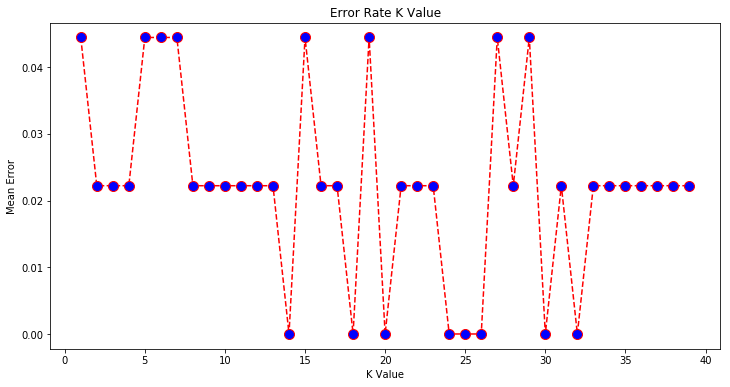

In [18]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

Podemos deducir que 3 o 7 serían mejores valores de K para tomar mejores predicciones:

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)

In [20]:
print(confusion_matrix(y_test, pred_i))  
print(classification_report(y_test, pred_i)) 

[[15  0  0]
 [ 0 15  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.94        17
           2       0.87      1.00      0.93        13

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Felicitaciones han entrenado su primer algoritmo de Machine Learning, para aprender un modelo predictivo y resolver un problema de clasificación simple.

<b>Preguntas:</b>

1) Reemplazar el algoritmo kNN por otro algoritmo existente en SciKit-Learn, por ejemplo: DecisionTree (Árbol de decisión) y Naive Bayes.

2) Dibujar un esquema que representa las etapas para entrenar y evaluar un modelo predictivo

3) Explicar los conceptos de Características (Features) y Clases (Classes)

4) ¿En Machine Learning, las características tienen siempre que ser numéricas?

In [22]:
#1 Naive Bayes Los parámetros iris.data y iris.target se estiman utilizando la máxima verosimilitud.
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("numero mal etiquetado de puntos de un total de  %d puntos : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

numero mal etiquetado de puntos de un total de  150 puntos : 6


#2

características de un individuo => modelo predictivo => puntaje predictivo

#3

La ingeniería de características es el proceso de utilizar el conocimiento de dominio de los datos para crear características que hacen que los algoritmos de aprendizaje automático funcionen. La ingeniería de características es fundamental para la aplicación del aprendizaje automático, y es a la vez difícil y costosa.
Mientras que Clases permite contener una colección de datasets de diversos tipos que se utiliza en ArcGIS y se administra en una carpeta de archivos o una base de datos relacional.

#4

Investigue y no encontre informacion fidedigna, eso si indage y me di cuenta que los ejemplos que hay en este notebook son todas numericas, como es el caso de ver el ancho de los petalos y sepalos, o el coste de una casa.



## 5.  Caso de estudio: predecir la categoría de una imágen

Supongamos ahora que tenemos un base de datos que contiene imagenes de digitos (entre 0 y 9) escritos a mano. Queremos aprender un modelo capaz de reconocer el digito escrito.

<img src="digitos.png"></img>

<b>Pregunta:</b>
- ¿El problema corresponde a un problema de clasificación o de regresión?

De clasificacion, ya que es cuantitativo.

Más detalles sobre el dataset: http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

SciKit-Learn ofrece un método para cargar una muestra de este dataset:

In [23]:
from sklearn import datasets
digits = datasets.load_digits()

len(digits.data)

1797

El dataset contiene 1797 observaciones de digitos. Hay 10 clases y cada clase tiene ~180 ejemplos. Cada ejemplo consiste en una imagen de 8x8 pixeles

Veamos por ejemplo una imagén del dataset:

<Figure size 432x288 with 0 Axes>

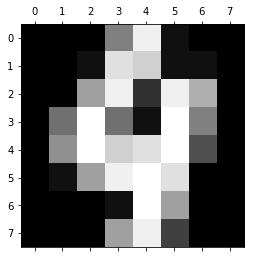

In [24]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[14]) 
plt.show() 

Cada observación 64 características que corresponde a un valor númerica (entre 1 y 16) que marca el nivel de gris de un pixel.

In [26]:
digits.data[14]

array([ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13.,
        1.,  1.,  0.,  0.,  0., 10., 15.,  3., 15., 11.,  0.,  0.,  7.,
       16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13., 14., 16.,  5.,
        0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
       16., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.])

Seguiremos el mismo protocolo que en el caso de estudio anterior:

1. dividir el dataset en 2 partes: entrenamiento y test

2. entrenar un modelo predictivo

3. evaluar el modelo comparando sus predicciones con las clases reales

Empezamos con dividir el dataset en 2 partes:

In [27]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(digits['data'],digits['target'], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 64) (1257,)
(540, 64) (540,)


Entrenamos un modelo predictivo utilizando el algoritmo Árbol de Decisión:

In [28]:
from sklearn import tree

algo_arbol = tree.DecisionTreeClassifier()

modelo = algo_arbol.fit(X_train, y_train)

Luego, utilizamos el modelo para realizar predicciones:

In [29]:
y_predicciones = modelo.predict(X_test)

In [30]:
for p in y_predicciones:
    print(p,end=',')

3,6,0,9,7,4,1,3,9,0,9,2,0,2,9,7,0,6,9,0,5,7,7,4,1,7,4,2,8,7,6,6,4,8,3,4,9,8,2,2,7,4,6,6,3,3,0,4,6,9,0,6,8,6,5,0,9,5,8,3,0,3,2,1,7,5,4,3,9,1,5,4,0,5,8,2,2,5,3,1,2,8,6,3,6,2,1,8,2,1,3,0,8,3,2,5,3,7,3,5,1,2,0,1,0,0,6,9,5,5,1,7,0,6,2,9,4,4,9,0,0,7,3,7,2,0,3,8,1,7,4,6,5,1,3,0,3,9,8,4,5,3,1,7,2,5,0,3,7,7,6,0,0,2,1,3,4,8,4,5,3,5,2,7,1,7,1,6,0,4,7,2,5,1,3,0,0,9,2,1,4,6,9,1,9,0,3,7,9,6,1,1,3,5,4,1,6,1,7,9,3,7,6,0,9,1,5,6,1,5,5,8,6,3,2,2,2,2,8,7,3,4,3,8,8,3,5,4,0,9,3,0,6,6,4,7,3,6,3,9,5,1,1,0,4,3,7,4,7,1,0,2,3,0,6,3,6,9,8,1,4,7,6,8,7,3,5,6,0,8,6,7,3,2,4,0,2,5,7,3,9,7,0,9,6,5,9,1,3,2,5,8,6,8,9,9,0,0,2,4,9,7,4,8,2,9,2,1,5,6,1,2,6,7,6,1,7,4,7,4,9,5,8,1,1,5,1,8,4,4,1,1,6,9,9,9,6,6,9,1,0,2,2,5,7,6,8,1,5,8,7,0,5,8,6,8,1,2,2,1,5,9,4,8,5,0,9,6,0,4,6,6,1,7,4,5,4,3,2,5,1,1,5,7,1,1,8,6,0,5,1,5,0,1,2,9,9,9,1,8,6,1,3,0,1,6,1,6,8,2,5,7,3,7,4,8,3,5,4,7,0,9,4,0,4,0,0,8,1,4,4,4,2,4,6,7,8,7,4,1,9,5,9,2,3,3,1,4,8,0,7,6,0,3,4,6,3,8,5,4,9,1,3,9,6,8,2,2,6,3,8,4,2,6,8,5,2,0,8,5,5,8,7,0,7,8,0,8,3,1,4,4,1,5,8,8,1,5,4,4,

In [31]:
for c in y_test:
    print(c,end=',')

9,6,0,9,4,4,1,3,8,0,1,2,0,2,9,7,0,6,9,0,5,7,2,4,1,7,4,2,8,7,6,6,4,8,3,4,8,8,1,2,7,7,6,6,3,3,0,4,6,3,0,3,8,6,5,0,9,5,9,3,0,3,2,2,7,5,9,3,9,1,5,4,0,5,8,2,2,4,6,1,2,8,6,5,6,2,1,8,2,1,3,0,8,5,2,8,3,7,3,5,1,2,0,8,0,0,6,2,5,5,1,7,0,6,2,9,4,5,1,0,0,7,3,7,2,0,3,8,1,7,4,6,5,1,3,0,3,9,8,4,5,1,1,7,2,5,0,3,7,4,6,0,0,2,1,3,4,8,0,5,3,5,8,7,1,7,1,6,0,4,7,2,5,1,9,0,0,9,2,1,4,6,7,1,5,0,9,7,9,6,1,1,1,5,4,1,6,1,7,9,3,7,6,0,9,8,5,4,1,5,5,8,6,1,2,2,0,2,8,7,3,4,3,8,8,3,5,4,0,9,3,0,6,6,4,7,3,6,4,9,5,1,1,0,4,3,7,4,7,1,0,2,3,0,6,2,4,9,8,1,4,7,6,8,7,3,5,6,0,8,6,7,3,2,4,0,2,5,7,3,9,7,0,9,6,4,9,4,3,3,5,8,6,8,9,9,8,0,2,4,9,7,4,8,2,1,2,1,9,6,1,2,6,7,6,1,7,4,7,9,9,5,1,1,2,5,1,8,7,4,1,1,6,3,9,9,6,6,9,1,0,2,4,5,1,6,8,1,5,8,7,0,5,8,6,8,6,2,2,1,5,9,4,8,5,0,9,6,0,4,6,6,1,7,4,6,4,3,2,5,1,1,6,7,1,1,8,6,0,5,1,5,0,1,2,9,9,9,1,8,6,1,8,0,8,6,4,6,8,2,5,7,3,7,4,8,1,5,4,7,0,9,4,0,4,0,0,8,1,4,4,4,2,4,6,5,8,7,7,1,9,5,9,2,3,3,1,4,3,7,7,6,0,3,4,6,3,8,5,4,1,1,3,1,6,8,2,2,6,3,8,4,2,6,8,5,2,0,8,5,5,8,7,0,4,8,0,8,3,8,4,4,2,5,8,2,1,5,4,4,

In [32]:
print(confusion_matrix(y_test, y_predicciones))  
print(classification_report(y_test, y_predicciones)) 

[[57  0  1  0  1  0  0  0  0  0]
 [ 0 50  1  4  0  0  0  1  1  6]
 [ 0  4 45  1  0  0  0  1  1  1]
 [ 0  0  1 41  0  0  1  0  1  2]
 [ 0  2  1  1 48  2  2  3  0  0]
 [ 0  0  0  2  1 47  0  1  0  1]
 [ 0  2  0  1  0  2 53  0  0  0]
 [ 1  0  0  1  4  0  0 43  0  1]
 [ 1  4  1  1  0  1  0  0 46  2]
 [ 0  0  0  3  2  1  0  1  1 36]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.81      0.79      0.80        63
           2       0.90      0.85      0.87        53
           3       0.75      0.89      0.81        46
           4       0.86      0.81      0.83        59
           5       0.89      0.90      0.90        52
           6       0.95      0.91      0.93        58
           7       0.86      0.86      0.86        50
           8       0.92      0.82      0.87        56
           9       0.73      0.82      0.77        44

   micro avg       0.86      0.86      0.86       540
   macro avg       

<b>Preguntas</b>
- ¿Cuál es la diferencia entre Precision y Recall?

La precisión es la fracción de todas las instancias relevantes dividido entre las instancias obtenidas.

La recuperación es la fracción de instancias relevantes que se han obtenido sobre la cantidad total de instancias relevantes.


- ¿Entre DecisionTree, Naive Bayes y Regresión Logistica, qué algoritmo permite obtener un mejor modelo predictivo?

Depende de que queremos conseguir y los datos que disponemos.

## 6. Caso de estudio: predecir el precio de una casa

Finalmente supongamos que queremos predecir el precio de una casa a partir de varias variables: el nivel de criminalidad en el barrio, la tasa de negocios en los alrededores, el número de habitaciones, etc.

El dataset 'Boston' contiene datos sobre 506 casas de la ciudad de Boston: https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [33]:
from sklearn import datasets
boston = datasets.load_boston()

Miramos cuales son los atributos del dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [34]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=boston['data'],columns= boston['feature_names'])
prices = pd.DataFrame(data=boston['target'],columns=['target'])
#Mostrar los 5 primeros datos del dataset
data[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Esta vez, la variable que predecir es una variable continua (en M$):

In [36]:
prices[:5]

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


De la misma manera que antes, dividimos el dataset en 2 partes: entrenamiento y test.

In [37]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(boston['data'],boston['target'], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


Para problemas de regresión (predicción de una variable continua), un algoritmo a menudo utilizado es la <b>regresión lineal</b>.  la regresión lineal consiste en encontrar una recta, un plano o un hiperplano que aproxima la distribución de un conjunto de puntos. Detallamos esta idea a continuación con ejemplos e implementación en Python. 

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

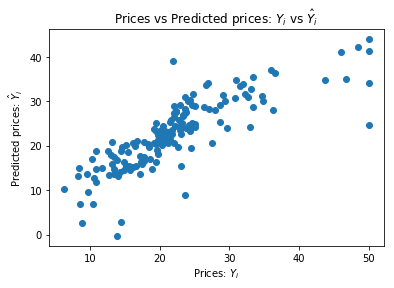

In [38]:
from sklearn.linear_model import LinearRegression

#Creamos un modelo de regresión lineal a partir del dataset de entrenamiento
lm = LinearRegression()
modelo = lm.fit(X_train, y_train)

#Utilizamos el modelo para hacer predicciones sobre el dataset de test
y_pred = modelo.predict(X_test)


#Comparamos las predicciones de precio y el precio real en un grafico.
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Idealmente, la gráfica debería crear una recta. Como el modelo no se ajusta al 100%, el gráfico no está creando una recta perfecta.

Para comprobar el nivel de error de un modelo, podemos medir el error al cuadrado (<b>Mean Squared Error (MSE)</b>). Es uno de los procedimientos para medir el promedio de los errores al cuadrado. Básicamente, comprobará la diferencia entre el valor real y el valor previsto. Para ()usarlo, podemos usar la función de error promedio al cuadrado de scikit-learn ejecutando este fragmento de código.

In [39]:
import sklearn

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

26.225840745015955


Como es un promedio de errores al cuadrado, podemos tambien calcular la raiz de este error para medir el error promedio. Esta metrica se llama <b>Root Mean Squared Error (RMSE)</b>:

In [43]:
import math 

math.sqrt(mse)

5.121117138380644

En promedio, nuestro modelo logra predicir el precio de una casa con un error de 4.94 M$.

In [44]:
modelo.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Lo que hace el algoritmo de regresión lineal es buscar los pesos asociados a las caracteristicas del problema para resolver una ecuación lineal de tipo:

<b>y = b0 + b1X1 + b2X2 + ... + bnXn</b>

En nuestro problema tenemos 13 atributos + el sesgo/intercept (b0). 




In [45]:
modelo.coef_

array([-1.08908797e-01,  4.40610414e-02,  8.33689160e-02,  2.85497031e+00,
       -1.81657030e+01,  4.01285326e+00,  1.80692853e-02, -1.24575328e+00,
        3.31579152e-01, -1.22129848e-02, -1.06889474e+00,  8.35641295e-03,
       -5.76483323e-01])

In [46]:
modelo.intercept_

35.6765501429997

Por lo tanto, podemos re-escribir nuestra propia función de predicción de la siguiente manera:

In [47]:
def predict_price_of_house(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13):
    return 25.171365903265137 - 0.120255045 * x1 
    + 0.0414724485 * x2 + 0.0182359951* x3 +  3.62945531*x4 - 17.1108207*x5 + 4.71432683*x6 
    - 0.00923441403*x7 - 1.46178894*x8 + 0.0302822426*x9 - 0.0113899214*x10 
    - 0.768059936*x11 + 0.0142606052*x12 - 0.492988421 *x13

In [48]:
print("¿Cuál es el precio probable de la casa siguiente?")
predict_price_of_house(0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33)

¿Cuál es el precio probable de la casa siguiente?


25.163062292407886

<b>Pregunta</b>

¿Cuáles son los precios que generan mayor impacto sobre el precio de una caso (según este dataset)?

Los que estan en el rango de 25-35.

## Ejercicio

Utilizando los datasets disponibles en Scikit-Learn (https://scikit-learn.org/stable/datasets/index.html), seguir un protocolo de Machine Learning para aprender un modelo predictivo. Utilizarán el dataset 'Wine' para resolver un problema de clasificación y 'diabetes' para resolver un problema de regresión.

In [49]:
from sklearn import datasets
wine = datasets.load_wine()

import numpy as np
import pandas as pd
data = pd.DataFrame(data=wine['data'],columns= wine['feature_names'])
category = pd.DataFrame(data=wine['target'],columns=['target'])
#Mostrar los 5 primeros datos del dataset
#data[:5]
#print(wine.DESCR)
#categories[:5]
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(wine['data'],wine['target'], test_size=0.3)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

0,0,0,0,1,2,1,0,1,2,0,0,0,1,2,2,1,0,0,0,2,1,1,1,0,1,2,1,0,0,2,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,
0,0,0,0,1,2,1,0,1,2,0,0,0,2,1,1,1,1,0,0,2,1,1,2,0,1,1,1,0,0,2,1,0,1,2,2,2,1,2,0,0,2,0,0,0,0,1,1,2,2,2,1,2,0,

[[20  1  0]
 [ 1 14  3]
 [ 1 10  4]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.56      0.78      0.65        18
           2       0.57      0.27      0.36        15

   micro avg       0.70      0.70      0.70        54
   macro avg       0.68      0.67      0.65        54
weighted avg       0.70      0.70      0.68        54



Text(0, 0.5, 'Mean Error')

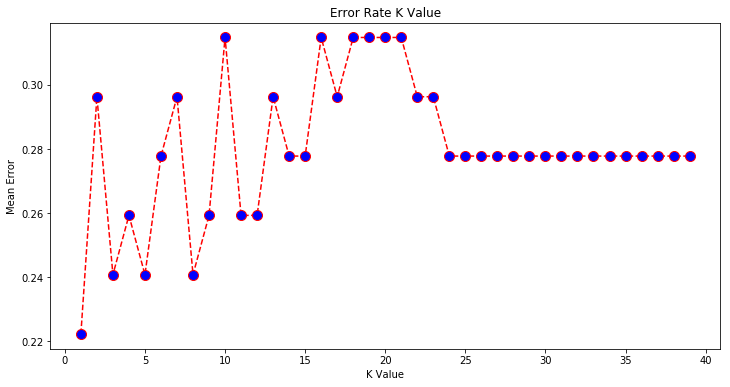

In [50]:
from sklearn.neighbors import KNeighborsClassifier 

#Inicializamos el algoritmo k_Vecinos_más_cercano con un parametro de 4 vecinos.
algo_knn = KNeighborsClassifier(n_neighbors=7)  
modelo_predictivo = algo_knn.fit(X_train, y_train)

predicciones = modelo_predictivo.predict(X_test)
for p in predicciones:
    print(p,end=',')
print('')
for i in y_test:
    print(i,end=',')
print('')
print('')
    
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, predicciones))  
print(classification_report(y_test, predicciones)) 

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [51]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

import numpy as np
import pandas as pd
data = pd.DataFrame(data=diabetes['data'],columns= diabetes['feature_names'])
prices = pd.DataFrame(data=diabetes['target'],columns=['target'])
#Mostrar los 5 primeros datos del dataset
data[:5]


#dividimos en dos .
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(boston['data'],boston['target'], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


26.76137580377113


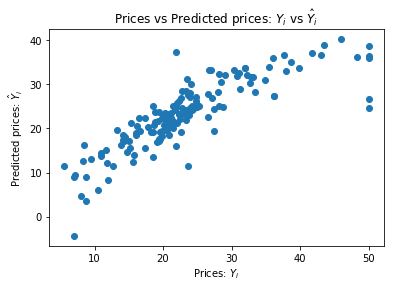

In [52]:
from sklearn.linear_model import LinearRegression

#Creamos un modelo de regresión lineal a partir del dataset de entrenamiento
lm = LinearRegression()
modelo = lm.fit(X_train, y_train)

#Utilizamos el modelo para hacer predicciones sobre el dataset de test
y_pred = modelo.predict(X_test)


#Comparamos las predicciones de precio y el precio real en un grafico.
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#predicion
import sklearn

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)